<ipython-input-9-5165587ead44>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-9-5165587ead44>:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 2000x1200 with 0 Axes>

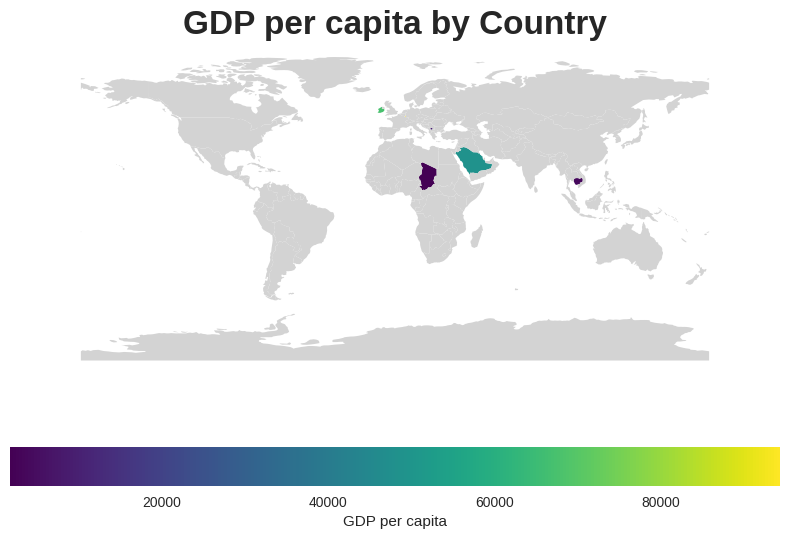

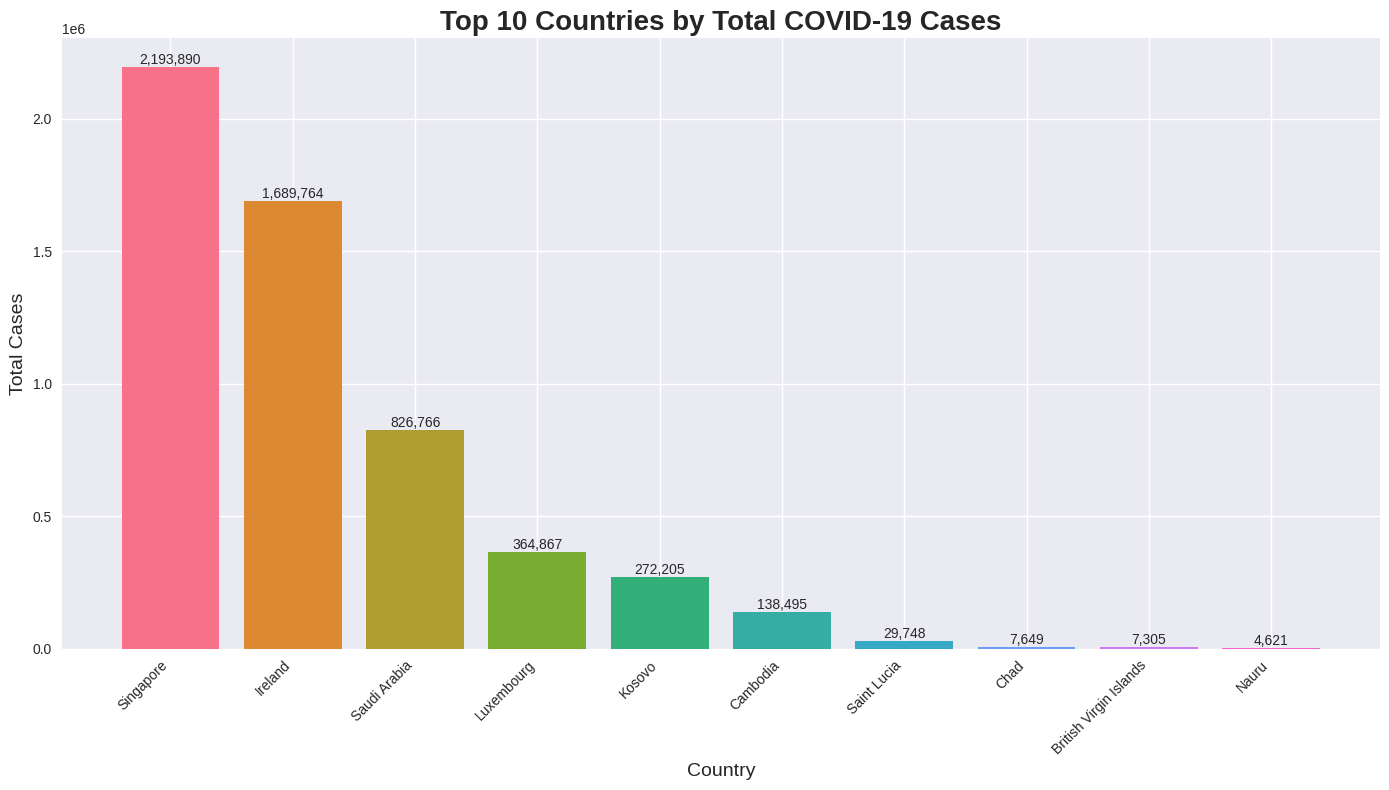

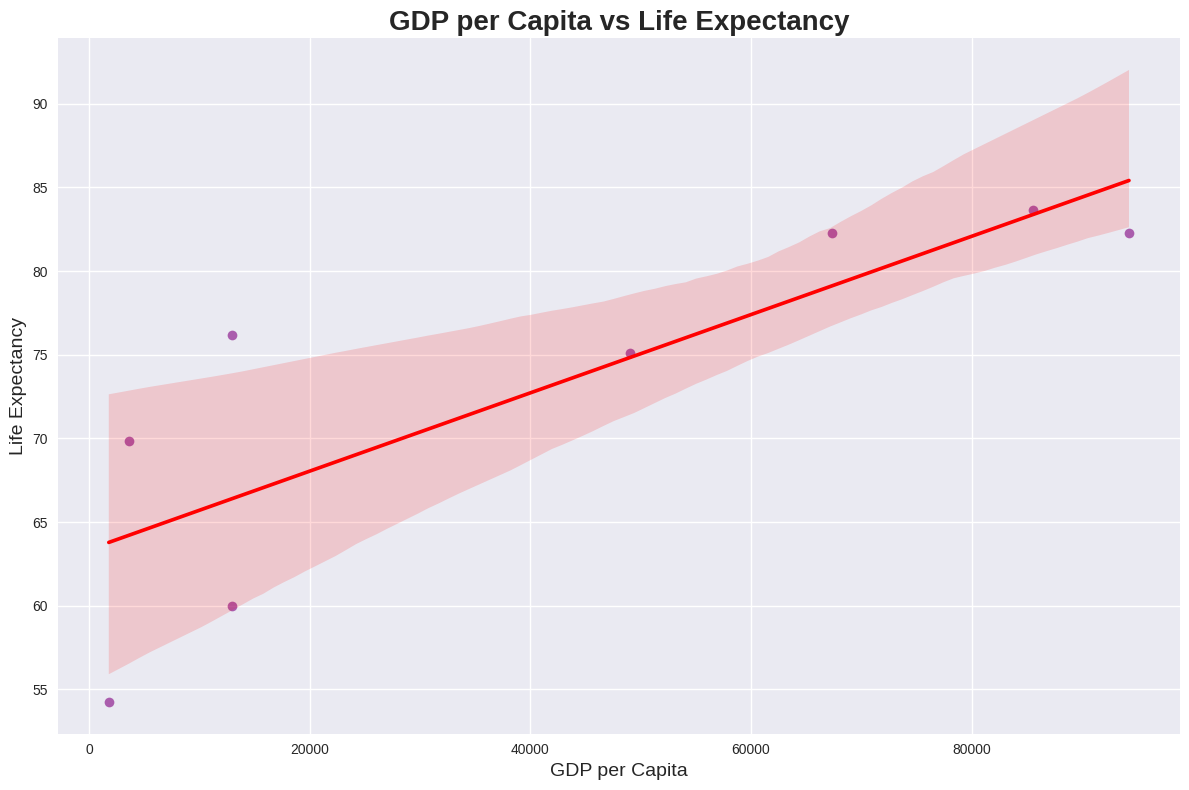

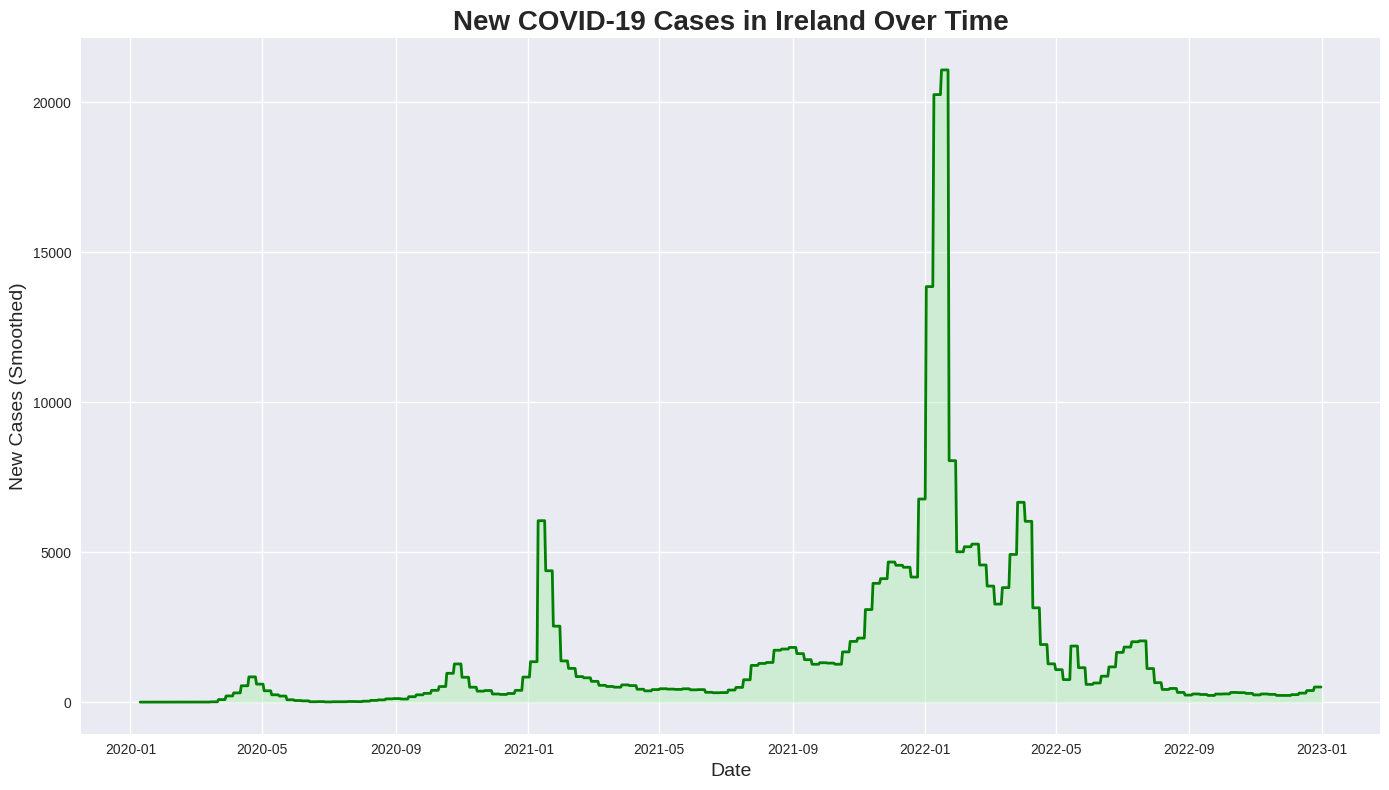

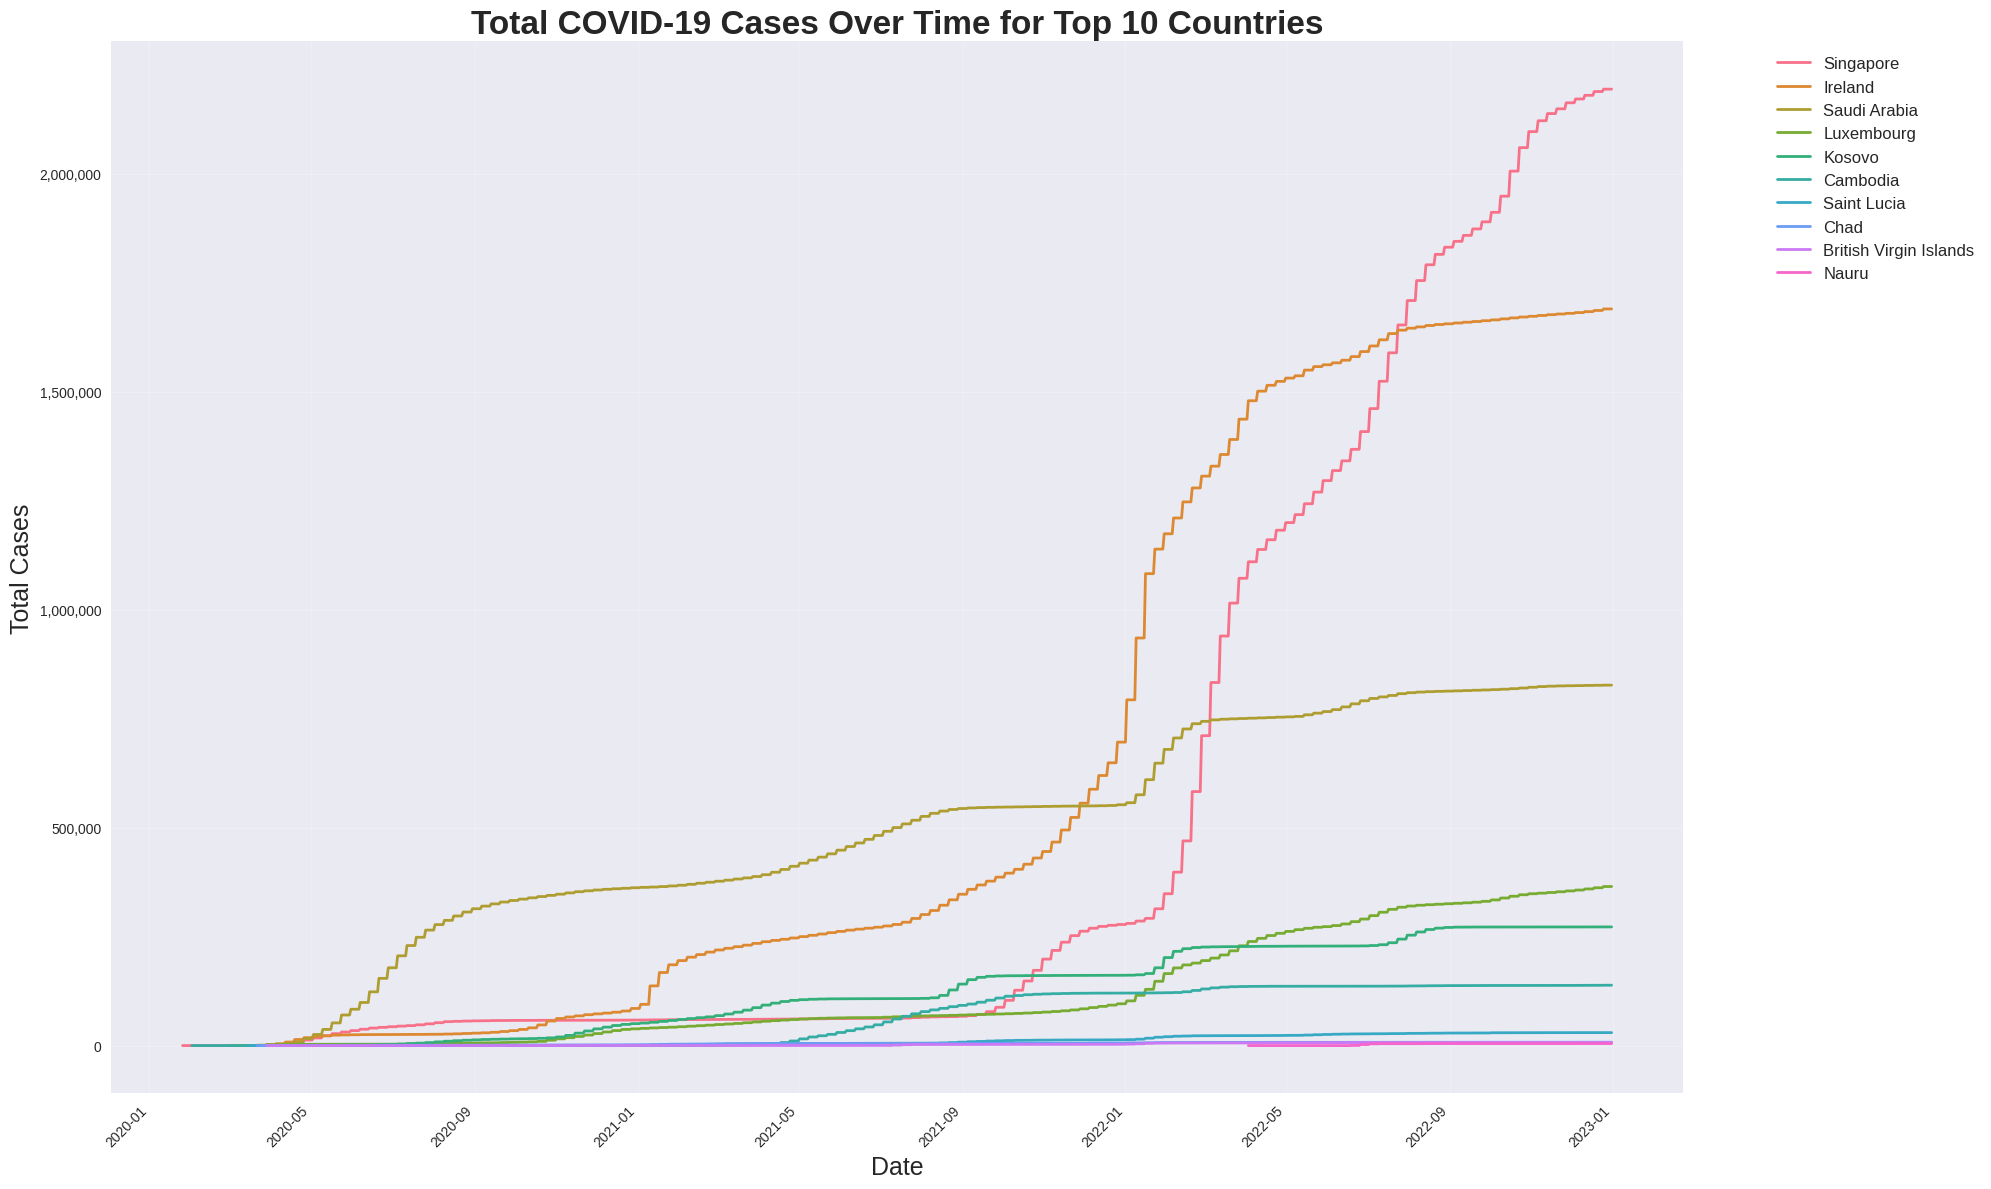

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
from datetime import timedelta

# Load the data
covid_data = pd.read_csv('/content/drive/My Drive/country_data.csv')
metadata = pd.read_csv('/content/drive/My Drive/country_metadata.csv')

# Custom color palette
custom_palette = sns.color_palette("husl", 10)
plt.style.use('seaborn')

# 1. World Map Chart
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(metadata, how='left', left_on=['name'], right_on=['location'])

plt.figure(figsize=(20, 12))
world.plot(column='gdp_per_capita', cmap='viridis', legend=True,
           legend_kwds={'label': 'GDP per capita', 'orientation': 'horizontal'},
           missing_kwds={'color': 'lightgrey'})
plt.title('GDP per capita by Country', fontsize=24, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# 2. Bar Chart
top_10_countries = covid_data.groupby('location')['total_cases'].max().nlargest(10)

plt.figure(figsize=(14, 8))
bars = plt.bar(top_10_countries.index, top_10_countries.values, color=custom_palette)
plt.title('Top 10 Countries by Total COVID-19 Cases', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom', fontsize=10, rotation=0)

plt.tight_layout()
plt.show()

# 3. Scatterplot with Linear Regression
plt.figure(figsize=(12, 8))
sns.regplot(data=metadata, x='gdp_per_capita', y='life_expectancy',
            scatter_kws={'color': 'purple', 'alpha': 0.6},
            line_kws={'color': 'red'})
plt.title('GDP per Capita vs Life Expectancy', fontsize=20, fontweight='bold')
plt.xlabel('GDP per Capita', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.tight_layout()
plt.show()

# 4. Time-series Chart Ireland
ireland_data = covid_data[covid_data['location'] == 'Ireland']

plt.figure(figsize=(14, 8))
plt.plot(pd.to_datetime(ireland_data['date']), ireland_data['new_cases_smoothed'],
         color='green', linewidth=2)
plt.title('New COVID-19 Cases in Ireland Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('New Cases (Smoothed)', fontsize=14)
plt.fill_between(pd.to_datetime(ireland_data['date']), ireland_data['new_cases_smoothed'],
                 color='lightgreen', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Time Series Chart all Countries
covid_data['date'] = pd.to_datetime(covid_data['date'])
top_countries = covid_data.groupby('location')['total_cases'].max().nlargest(10).index
filtered_data = covid_data[covid_data['location'].isin(top_countries)]

plt.figure(figsize=(20, 12))

for i, country in enumerate(top_countries):
    country_data = filtered_data[filtered_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'],
             label=country, color=custom_palette[i], linewidth=2)

plt.title('Total COVID-19 Cases Over Time for Top 10 Countries', fontsize=24, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Cases', fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.2)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


